In [1]:
import sys
sys.path.append('../')
from tqdm import tqdm
import numpy as np
import healpy as hp
from tqdm.contrib import tzip
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
import ptep_mbs
from ptep_mbs.pipeline import Sims

In [3]:
ptep_mbs.version == '1.1'

True

In [4]:
s_64 = Sims('../ptep_mbs/configs/config_PTEP_20200915_compsep.py')
s_32 = Sims('../ptep_mbs/configs/config_PTEP_20200915_compsepv2.py')

Foreground simulation for component dust: 100%|██████████| 22/22 [00:54<00:00,  2.49s/channel]


Foreground simulation for component dust: 100%|██████████| 22/22 [00:00<00:00, 106.01channel/s]


In [5]:
sim_no = 1


In [6]:
cmb_64,fg_nobp,noise,coadded = s_64.generate_sim(sim_no)
cmb_32,fg_bp,noise,coadded = s_32.generate_sim(sim_no)

Keeping as float64


Noise simulation: 100%|██████████| 22/22 [00:00<00:00, 64.26channel/s]


Converted to float32


Noise simulation: 100%|██████████| 22/22 [00:00<00:00, 65.65channel/s]


In [7]:
b_32,b_64 = [],[]
for d_32,d_64 in tzip(cmb_32, cmb_64):
    b_32.append(hp.alm2cl(hp.map2alm(d_32)[-1]))
    b_64.append(hp.alm2cl(hp.map2alm(d_64)[-1]))
b_32 = np.array(b_32)
b_64 = np.array(b_64)

  0%|          | 0/22 [00:00<?, ?it/s]

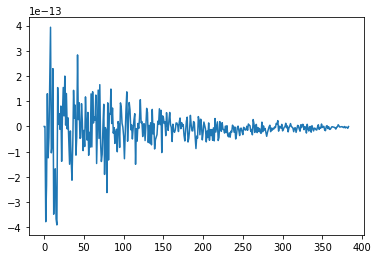

In [8]:
plt.plot(b_64.mean(0)-b_32.mean(0))


In [10]:
fb_wobp,fb_wbp = [],[]
for fd_32,fd_64 in tzip(fg_nobp, fg_bp):
    fb_wobp.append(hp.alm2cl(hp.map2alm(fd_32)[-1]))
    fb_wbp.append(hp.alm2cl(hp.map2alm(fd_64)[-1]))
fb_wobp = np.array(fb_wobp)
fb_wbp = np.array(fb_wbp)

  0%|          | 0/22 [00:00<?, ?it/s]

In [12]:
len(fb_wobp),len(fb_wbp)

(22, 22)

(0.0, 50.0)

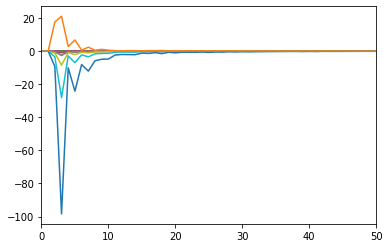

In [17]:
for i in range(22):
    plt.plot(fb_wobp[i]-fb_wbp[i])
plt.xlim(0,50)

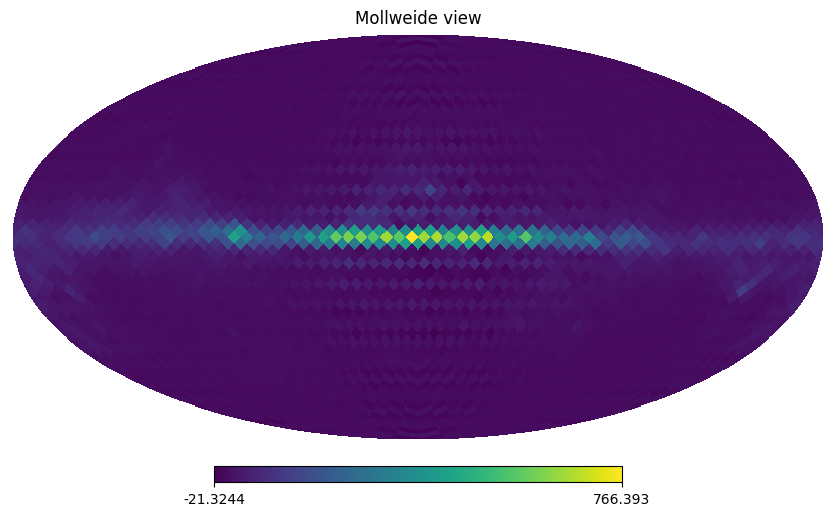

In [ ]:
hp.mollview(fg[2][0])

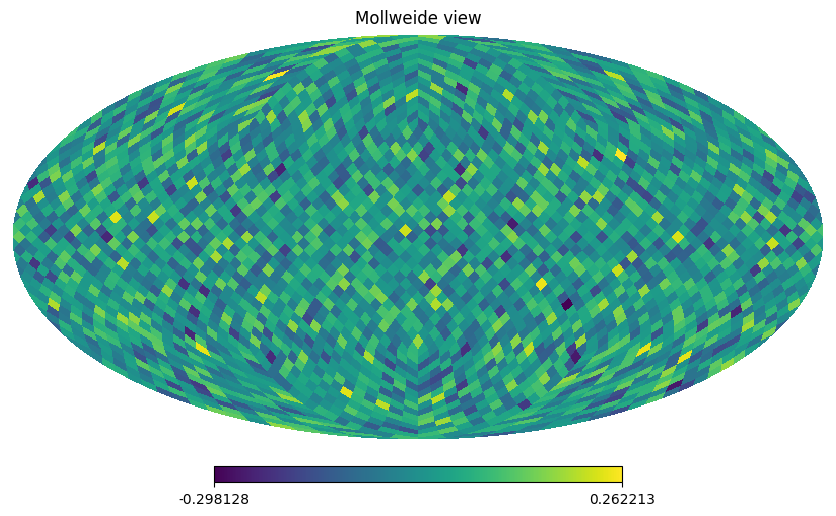

In [ ]:
hp.mollview(noise[2][0])

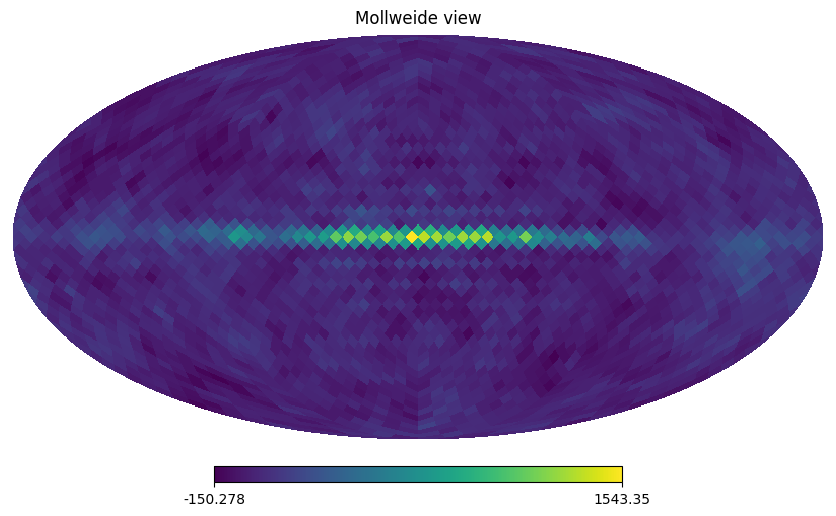

In [ ]:
hp.mollview(coadded[7][0])